In [1]:
#import rpy2.robjects as robjects

# You would extract and run the R code manually using rpy2
# For example, you can load R objects and data from R commands here

# Read the R Markdown file as plain text
with open("/Users/sherrywang/Downloads/IDS789/789.rmd", "r") as file:
    content = file.read()
    print(content)


---
title: "IDS 789"
output: html_document
date: "2024-11-11"
---

```{r setup, include=FALSE}
knitr::opts_chunk$set(echo = TRUE)

install.packages("readxl")
library(readxl)

install.packages("dplyr")
library(dplyr)
```

## Data Setup

### FDIC Quarterly Banking Profile

```{r}
data <- read_excel("balance-sheet (3).xlsx")

# Remove the first 3 rows
data <- data[-c(1:3), ]

# Remove rows that are completely blank
data <- data[rowSums(is.na(data) | data == "") < ncol(data), ]
```

```{r}
# Extract the current variable names (first row) as a new column
time <- as.character(data[1, ])
time <- time[-1]

# Set the entries in the first column as the new variable names
row_names <- data[[1]]
row_names <- row_names[-c(1, length(row_names))]

# Remove the first row and the first column
data1 <- data[-1, -1]

# Transpose the data
data1 <- t(data1)  # Corrected to transpose the reduced data frame, data1
data1 <- data1[, -91]
data1 <- as.data.frame(data1, stringsAsFactors = FALSE)

# Define variabl

In [2]:

import pandas as pd

# Load the .dta file into a DataFrame
df = pd.read_stata("/Users/sherrywang/Downloads/IDS789/data2.dta")
import pandas as pd

# Set display options for maximum rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display your DataFrame
df['deposits']



0       22917.257
1       23575.192
2       24308.965
3       24967.964
4       25673.746
5       26941.332
6       27141.405
7       27133.355
8       28651.198
9       29041.646
10      29089.391
11      28841.488
12      28715.469
13      30084.121
14      30114.432
15      30112.629
16      29670.701
17      30050.617
18      28929.456
19      27407.592
20      22463.251
21      22035.364
22      20782.366
23      18774.087
24      17379.316
25      17271.554
26      17116.974
27      16174.668
28      15608.863
29      14608.075
30      14221.318
31      13563.401
32      12346.514
33      12891.298
34      12849.570
35      12820.298
36      12835.764
37      13076.471
38      12820.749
39      13615.144
40      13540.975
41      14902.538
42      16234.489
43      17347.679
44      19601.736
45      20006.570
46      21032.702
47      21713.071
48      23586.351
49      29857.148
50      30391.749
51      31328.406
52      40035.438
53      42298.856
54      43752.527
55      45

In [3]:
df.columns

Index(['time', 'year', 'quarter', 'loans_re', 'loans_res_mort', 'loans_nonres',
       'loans_constr', 'loans_hel', 'loans_multi', 'loans_farmland',
       'loans_foreign_re', 'loans_com_ind', 'loans_indiv', 'loans_cc',
       'loans_indiv_other', 'loans_auto', 'loans_farm', 'loans_dep',
       'loans_foreign_gov', 'obligations_US', 'loans_other', 'accept_banks',
       'lease_receiv', 'loans_leases_gross', 'unearned_income', 'loans_leases',
       'reserve_losses', 'loans_leases_net', 'securities', 'sec_avail_sale',
       'sec_held_mat', 'sec_treasury', 'sec_mtg_backed', 'sec_state_muni',
       'sec_equity', 'cash_due_dep', 'fed_funds_sold', 'bank_fixed_assets',
       're_owned_other', 'trading_assets', 'assets_intang', 'mtg_serv_assets',
       'fv_mtg_serv', 'goodwill', 'assets_other', 'liab_cap', 'deposits',
       'deposits_foreign', 'deposits_domestic', 'deposits_interest',
       'deposits_noninterest', 'deposits_insured', 'deposits_time',
       'deposits_brokered', 'fed_fun

In [4]:
df_cleaned = df.dropna(axis=1)

In [5]:
df_cleaned

,time,year,quarter,loans_re,loans_res_mort,loans_nonres,loans_constr,loans_multi,loans_farmland,loans_com_ind,loans_indiv,loans_cc,loans_indiv_other,loans_auto,loans_farm,loans_dep,obligations_US,loans_other,accept_banks,lease_receiv,loans_leases_gross,loans_leases,reserve_losses,loans_leases_net,securities,sec_avail_sale,sec_held_mat,sec_treasury,sec_equity,cash_due_dep,fed_funds_sold,re_owned_other,trading_assets,assets_intang,mtg_serv_assets,fv_mtg_serv,goodwill,deposits,deposits_foreign,deposits_domestic,deposits_interest,deposits_noninterest,deposits_insured,deposits_time,deposits_brokered,fed_funds_purch,fhlb_advances,borrowed_other,bank_accept_liab,debt_subord,trading_liab,liab,bank_eq_cap,stock_pref,stock_common,surplus,profits,forex_adj,inc_comprehensive,gains_afs_sec,loans_30_89_due,loans_90plus_due,loans_restructured,income_uncollected,loans_foreign_office,loans_held_sale,assets_earning,loan_commit,cc_lines_unused,com_re_unused,date,JPM_open,JPM_high,JPM_low,JPM_close,JPM_volume,JPM_adjusted
0,1984Q1,1984.0,1.0,17885.0,1507883.0,3.373920e+06,1000767.164,168659.905,82512.338,76143.265,9685.725,9488.601,544150.172,261504.050,46520.512,214983.538,40141.623,75453.566,43352.639,36880.170,67095.432,18308.868,2.054168e+06,60841.611,2.034637e+06,18544.841,2.016092e+06,652720.974,116067.117,135522.619,123540.649,335789.073,99275.278,48984.226,9488.312,22673.922,25454.290,22917.257,100065.617,3.373965e+06,2.697459e+06,346927.996,2.350531e+06,1.860467e+06,363955.726,6.812202e+05,1242574.369,20858.724,222015.518,56123.698,68759.010,7645.612,66634.067,3.195962e+06,177695.587,177695.587,560.553,26826.661,59219.968,90545.224,1.474140e+05,1.474140e+05,25815.144,10896.438,32528.179,28886.177,259821.370,518397.846,2.955694e+06,459603.633,1984-01-01,9.763889,11.416667,9.694444,10.083333,1.758780e+07,2.185469
1,1984Q2,1984.0,2.0,17889.0,1570636.0,3.479612e+06,1045964.585,177911.496,89458.084,80906.268,10025.769,10267.934,565142.860,277997.483,51158.635,226838.848,42188.491,76008.174,44043.459,39543.964,71012.799,19113.537,2.144456e+06,64819.515,2.124682e+06,19219.377,2.105462e+06,657009.623,111668.526,144031.818,120842.327,334021.511,100055.723,49821.779,9748.990,17956.495,26444.677,23575.192,109916.389,3.479612e+06,2.773230e+06,345313.290,2.427917e+06,1.921613e+06,379300.050,1.981603e+06,1306506.070,26789.603,226097.684,64064.619,74686.036,9974.283,68494.170,3.298257e+06,181105.425,181105.425,601.406,27333.985,60711.893,91905.568,1.497576e+05,1.497576e+05,23477.379,9562.185,35042.125,30857.777,261610.827,514556.027,3.035538e+06,472429.567,1984-04-01,10.166667,11.083333,7.833333,8.000000,2.651940e+07,1.774186
2,1984Q3,1984.0,3.0,17898.0,1517173.0,3.520867e+06,1081006.784,187877.399,95575.014,83868.639,10208.894,10135.080,566407.983,293062.319,56645.153,236417.166,42375.391,74903.874,42959.259,43554.645,70346.462,19857.457,2.196791e+06,66032.081,2.176827e+06,19993.604,2.156834e+06,657410.662,108112.065,147400.101,119895.302,312948.240,98432.351,50433.840,10445.622,27297.570,27203.294,24308.965,116391.950,3.520867e+06,2.781986e+06,326893.665,2.455093e+06,1.964713e+06,364125.250,2.002240e+06,1370983.133,25259.974,235380.602,70956.781,77419.972,9679.999,70752.345,3.334936e+06,185597.026,185597.026,719.401,28711.939,61700.502,93981.017,1.544827e+05,1.544827e+05,24136.255,9403.549,34227.727,33685.003,255479.613,403985.648,3.080509e+06,485485.082,1984-07-01,8.000000,10.916667,7.916667,10.166667,2.549370e+07,2.303449
3,1984Q4,1984.0,4.0,17901.0,1573287.0,3.653117e+06,1106192.417,197455.190,101280.900,86997.618,10203.157,10832.407,581967.248,311073.622,64110.208,246963.414,40392.502,73001.279,41106.912,49486.127,79365.599,21339.234,2.266110e+06,64975.495,2.246259e+06,21899.118,2.224360e+06,673754.356,108132.948,143709.982,122319.374,340803.967,113815.463,51086.406,10835.612,28610.381,28117.747,24967.964,119956.543,3.653117e+06,2.907668e+06,317569.815,2.590098e+06,2.043037e+06,421535.819,2.023598e+06,1407294.882,25682.330,240734.505,72403.286,79

In [6]:
df_reduced = df_cleaned.iloc[:, 3:-7]

In [9]:
df_reduced= df_reduced.drop(columns=['deposits'])


In [11]:
df_reduced

,loans_re,loans_res_mort,loans_nonres,loans_constr,loans_multi,loans_farmland,loans_com_ind,loans_indiv,loans_cc,loans_indiv_other,loans_auto,loans_farm,loans_dep,obligations_US,loans_other,accept_banks,lease_receiv,loans_leases_gross,loans_leases,reserve_losses,loans_leases_net,securities,sec_avail_sale,sec_held_mat,sec_treasury,sec_equity,cash_due_dep,fed_funds_sold,re_owned_other,trading_assets,assets_intang,mtg_serv_assets,fv_mtg_serv,goodwill,deposits_foreign,deposits_domestic,deposits_interest,deposits_noninterest,deposits_insured,deposits_time,deposits_brokered,fed_funds_purch,fhlb_advances,borrowed_other,bank_accept_liab,debt_subord,trading_liab,liab,bank_eq_cap,stock_pref,stock_common,surplus,profits,forex_adj,inc_comprehensive,gains_afs_sec,loans_30_89_due,loans_90plus_due,loans_restructured,income_uncollected,loans_foreign_office,loans_held_sale,assets_earning,loan_commit,cc_lines_unused,com_re_unused
0,17885.0,1507883.0,3.373920e+06,1000767.164,168659.905,82512.338,76143.265,9685.725,9488.601,544150.172,261504.050,46520.512,214983.538,40141.623,75453.566,43352.639,36880.170,67095.432,18308.868,2.054168e+06,60841.611,2.034637e+06,18544.841,2.016092e+06,652720.974,116067.117,135522.619,123540.649,335789.073,99275.278,48984.226,9488.312,22673.922,25454.290,100065.617,3.373965e+06,2.697459e+06,346927.996,2.350531e+06,1.860467e+06,363955.726,6.812202e+05,1242574.369,20858.724,222015.518,56123.698,68759.010,7645.612,66634.067,3.195962e+06,177695.587,177695.587,560.553,26826.661,59219.968,90545.224,1.474140e+05,1.474140e+05,25815.144,10896.438,32528.179,28886.177,259821.370,518397.846,2.955694e+06,459603.633
1,17889.0,1570636.0,3.479612e+06,1045964.585,177911.496,89458.084,80906.268,10025.769,10267.934,565142.860,277997.483,51158.635,226838.848,42188.491,76008.174,44043.459,39543.964,71012.799,19113.537,2.144456e+06,64819.515,2.124682e+06,19219.377,2.105462e+06,657009.623,111668.526,144031.818,120842.327,334021.511,100055.723,49821.779,9748.990,17956.495,26444.677,109916.389,3.479612e+06,2.773230e+06,345313.290,2.427917e+06,1.921613e+06,379300.050,1.981603e+06,1306506.070,26789.603,226097.684,64064.619,74686.036,9974.283,68494.170,3.298257e+06,181105.425,181105.425,601.406,27333.985,60711.893,91905.568,1.497576e+05,1.497576e+05,23477.379,9562.185,35042.125,30857.777,261610.827,514556.027,3.035538e+06,472429.567
2,17898.0,1517173.0,3.520867e+06,1081006.784,187877.399,95575.014,83868.639,10208.894,10135.080,566407.983,293062.319,56645.153,236417.166,42375.391,74903.874,42959.259,43554.645,70346.462,19857.457,2.196791e+06,66032.081,2.176827e+06,19993.604,2.156834e+06,657410.662,108112.065,147400.101,119895.302,312948.240,98432.351,50433.840,10445.622,27297.570,27203.294,116391.950,3.520867e+06,2.781986e+06,326893.665,2.455093e+06,1.964713e+06,364125.250,2.002240e+06,1370983.133,25259.974,235380.602,70956.781,77419.972,9679.999,70752.345,3.334936e+06,185597.026,185597.026,719.401,28711.939,61700.502,93981.017,1.544827e+05,1.544827e+05,24136.255,9403.549,34227.727,33685.003,255479.613,403985.648,3.080509e+06,485485.082
3,17901.0,1573287.0,3.653117e+06,1106192.417,197455.190,101280.900,86997.618,10203.157,10832.407,581967.248,311073.622,64110.208,246963.414,40392.502,73001.279,41106.912,49486.127,79365.599,21339.234,2.266110e+06,64975.495,2.246259e+06,21899.118,2.224360e+06,673754.356,108132.948,143709.982,122319.374,340803.967,113815.463,51086.406,10835.612,28610.381,28117.747,119956.543,3.653117e+06,2.907668e+06,317569.815,2.590098e+06,2.043037e+06,421535.819,2.023598e+06,1407294.882,25682.330,240734.505,72403.286,79094.685,12326.687,73799.684,3.463948e+06,188773.881,188773.881,817.893,29201.024,63947.923,94263.010,1.567823e+05,1.567823e+05,29877.224,9250.874,34353.201,31198.979,252000.379,400688.569,3.182705e+06,495915.517
4,17921.0,1578838.0,3.666443e+06,1126150.857,177238.698,136587.129,88924.702,10327.586,11149.968,587221.768,319655.925,67027.810,252628.115,38983.769,69906.872,41118.221,50338.679,75134.414,21836.303,2.291

In [49]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
feature_scaled = scaler.fit_transform(df_reduced)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=14)
feature_pca = pca.fit_transform(feature_scaled)

# Check the amount of variance explained by the components
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained variance with {pca.n_components_} components: {explained_variance:.2f}")

Explained variance with 14 components: 1.00


In [50]:
df_train = df.iloc[:-20].copy()
df_test = df.drop(df_train.index).copy()


In [51]:
dep_train = df['deposits'].iloc[:-20].copy()
date_train = df['time'].iloc[:-20].copy()
#tv_test = df.drop(tv_train.index).copy()
dep_test = df.drop(dep_train.index).copy()
date_test = df.drop(date_train.index).copy()




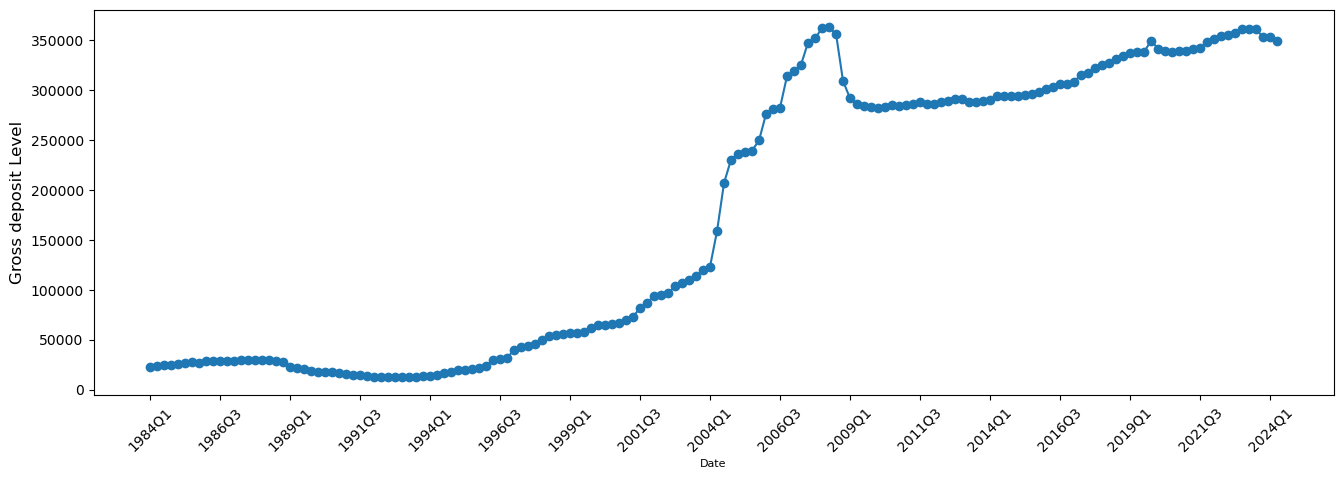

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


plt.figure(figsize=(16,5))

plt.plot(df.time,
            df.deposits,
            '-o')

plt.xticks(df.time[::10], rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=8)
plt.ylabel("Gross deposit Level", fontsize=12)

plt.show()

In [ ]:
"""def make_lag_plot(lag):
    x = dep_train.values[:-lag]
    y = dep_train.values[lag:]
    
    plt.figure(figsize=(5,5))
    
    plt.scatter(x, y, alpha=.7)
    plt.plot([0,100], [0,100], 'k--')
    
    plt.title("Lag = " + str(lag), fontsize=16)
    
    plt.show()
    
    return np.corrcoef(x,y)[0,1]

corr_coefs = []

for lag in range(1,25):
    corr_coefs.append(make_lag_plot(lag))



"""

In [52]:
import statsmodels.api as sm

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

sm.graphics.tsa.plot_acf(dep_train.values,
                            lags = 130,
                            ax = ax)

plt.title('The Deposit ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

sm.graphics.tsa.plot_acf(dep_train.diff(1).values[1:],
                               lags=100,
                               ax=ax)

plt.title('The First Differences Deposit ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

#some changes

In [53]:
from statsmodels.tsa.api import ARIMA

In [46]:
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n-m):
        denom += np.abs(y_train[i+1:i+m+1] - y_train[i]*np.ones(m)).mean()
    denom = denom / (n-m)
    num = np.abs(y_test - y_preds).mean()
    return num/denom


In [47]:
from sklearn.model_selection import TimeSeriesSplit
!pip install pmdarima
from pmdarima import auto_arima

In [35]:
cv = TimeSeriesSplit(n_splits=10, test_size=3)


In [ ]:
model = auto_arima(dep_train.values, trace=True, max_p=10, max_q=10,seasonal=True,scoring=mase)
print(model.summary())

In [ ]:
model1

In [ ]:
model1 = auto_arima(
                train,
                seasonal=True,
                m=m,
                max_p=10,
                max_q=10,
                trace=False,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
            )

In [ ]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Custom MASE function
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n - m):
        denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
    denom = denom / (n - m)
    num = np.abs(y_test - y_preds).mean()
    return num / denom

# Number of splits for cross-validation
k_folds = 5

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=k_folds)

# Placeholder for best results
best_m = None
best_score = float('inf')
results = {}

# Iterate over seasonal periods m = 1 to 12
for m in range(1, 40):
    print(f"Evaluating seasonal period m={m}")
    fold_scores = []
    # Perform k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(tscv.split(dep_train.values)):
        print(f"  Fold {fold + 1}")
        try:
            # Split the data into train and test
            train, test = dep_train.values[train_idx], dep_train.values[test_idx]
            
            # Fit auto_arima for the current fold and m
            model = auto_arima(
                train,
                seasonal=True,
                D = 1,
                m=m,
                max_p=10,
                max_q=10,
                trace=False,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
            )
            
            # Predict on the test set
            preds = model.predict(len(test))
            
            # Calculate MASE for the fold
            score = mase(train, test, preds)
            print(f"    MASE: {score:.4f}")
            print(model)
            fold_scores.append(score)
        except Exception as e:
            print(f"    Failed for m={m}, fold={fold + 1}: {e}")
            
    
    # Average MASE score across folds
    avg_score = np.mean(fold_scores)
    print(f"  Average MASE for m={m}: {avg_score:.4f}")
    print(model)
    results[m] = avg_score
    
    # Update the best m if the average score is lower
    if avg_score < best_score:
        best_score = avg_score
        best_m = m

# Print the best results
print(f"Best seasonal period m: {best_m}")
print(f"Best average MASE: {best_score:.4f}")

# Print all results for reference
print("All MASE scores per m:")
for m, score in results.items():
    print(f"  m={m}: {score:.4f}")


In [ ]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
#use one trainning set to fit and get lowest average
# Custom MASE function
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n - m):
        denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
    denom = denom / (n - m)
    num = np.abs(y_test - y_preds).mean()
    return num / denom

# Number of splits for cross-validation
k_folds = 5

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=k_folds)

# Placeholder for best results
best_m = None
best_score = float('inf')
results = {}

# Iterate over seasonal periods m = 1 to 12
for m in range(1, 40):
    print(f"Evaluating seasonal period m={m}")
    fold_scores = []

    # Step 1: Fit the ARIMA model using the entire training dataset
    try:
        print(f"Fitting ARIMA model for m={m} on the entire training set...")
        model = auto_arima(
            dep_train.values,  # Entire training dataset
            seasonal=True,
            m=m,
            D = 1,
            max_p=10,
            max_q=10,
            trace=False,
            error_action='ignore',
            suppress_warnings=True,
            stepwise=True
        )
        print(f"Fitted model for m={m}")
    except Exception as e:
        print(f"Failed to fit model for m={m}: {e}")
        continue

    # Step 2: Perform k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(tscv.split(dep_train.values)):
        print(f"  Fold {fold + 1}")
        try:
            # Split the data into train and test for the current fold
            train, test = dep_train.values[train_idx], dep_train.values[test_idx]
            
            # Predict on the test set using the pre-fitted model
            preds = model.predict(len(test), exogenous=None)
            
            # Calculate MASE for the fold
            score = mase(train, test, preds)
            print(f"    MASE: {score:.4f}")
            print(model)
            fold_scores.append(score)
        except Exception as e:
            print(f"    Failed for m={m}, fold={fold + 1}: {e}")
    
    # Step 3: Compute the average MASE score across folds
    if fold_scores:
        avg_score = np.mean(fold_scores)
        print(f"  Average MASE for m={m}: {avg_score:.4f}")
        results[m] = avg_score

        # Update the best m if the average score is lower
        if avg_score < best_score:
            best_score = avg_score
            best_m = m

# Print the best results
print(f"Best seasonal period m: {best_m}")
print(f"Best average MASE: {best_score:.4f}")

# Print all results for reference
print("All MASE scores per m:")
for m, score in results.items():
    print(f"  m={m}: {score:.4f}")


In [ ]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
#best fold MASE
# Custom MASE function
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n - m):
        denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
    denom = denom / (n - m)
    num = np.abs(y_test - y_preds).mean()
    return num / denom

# Number of splits for cross-validation
k_folds = 5

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=k_folds)

# Placeholder for best results
best_m = None
best_scores = float('inf')
results = {}

# Iterate over seasonal periods m = 1 to 39
for m in range(1, 8):
    print(f"Evaluating seasonal period m={m}")
    fold_scores = []
    
    # Perform k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(tscv.split(dep_train.values)):
        print(f"  Fold {fold + 1}")
        try:
            # Split the data into train and test
            train, test = dep_train.values[train_idx], dep_train.values[test_idx]
            
            # Fit auto_arima for the current fold and m
            model = auto_arima(
                train,
                seasonal=True,
                D=1,
                m=m,
                max_p=10,
                max_q=10,
                trace=False,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
            )
            
            # Predict on the test set
            preds = model.predict(len(test))
            
            # Calculate MASE for the fold
            score = mase(train, test, preds)
            print(f"    MASE: {score:.4f}")
            print(model)
            fold_scores.append(score)
        except Exception as e:
            print(f"    Failed for m={m}, fold={fold + 1}: {e}")
    
    # Average MASE score across folds
    print(model)
    results[m] = [score,model,fold]
   


# Print the best results
print(f"Best seasonal period m: {best_m}")
print(f"Best MASE: {best_scores:.4f}")
sorted_results = sorted(results.items(), key=lambda x: x[1][0])
print(sorted_results[1])


In [ ]:
sorted_results[1]


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Example time series data (replace with your actual data)
time_series_data = dep_train.values  # Assuming dep_train is your data

# Number of splits for TimeSeriesSplit
k_folds = 5
tscv = TimeSeriesSplit(n_splits=k_folds)

# Iterate over the splits and print the indices
for fold, (train_idx, test_idx) in enumerate(tscv.split(time_series_data)):
    print(f"Fold {fold + 1}")
    print(f"  Train indices: {train_idx}")
    print(f"  Test indices: {test_idx}")
    print(f"  Train data: {time_series_data[train_idx]}")
    print(f"  Test data: {time_series_data[test_idx]}")


In [ ]:
arima = auto_arima(dep_train.values, trace=True, seasonal=True, D = 1, m=5)
arima.summary()

In [ ]:
#arima = ARIMA(dep_train.values,order=(1, 1, 0), D = 1, m=5).fit()

sarima = ARIMA(dep_train.values,
                    order = (2,0,0),
                    seasonal_order = (0,1,1,7)).fit()
sarima.summary()
#(2,0,0)(0,1,1)[7]
#(2,0,0)(0,1,1)[6] 


In [ ]:
#MASE analysis:

test_mase = mase(y_train = dep_train.values, y_test = dep_test.deposits.values, y_preds = sarima.forecast(len(date_test)))


ValueError: x and y must have same first dimension, but have shapes (142,) and (1,)

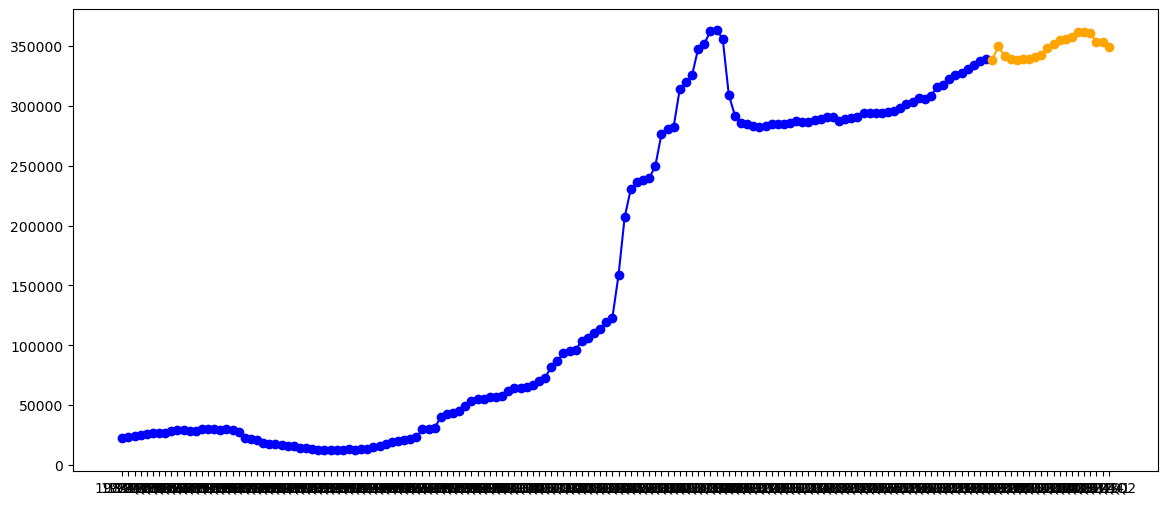

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train,
         dep_train,
         'b-o',
         label='Training Data')

# Plot test data
plt.plot(date_test.time,
         dep_test.deposits,
         color='orange',
         marker='o',
         label='Test Data')

# Plot fitted values for training data
plt.plot(date_train,
         sarima.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot(date_test.time,
         sarima.forecast(len(date_test)),
         '--r',
         label="Forecast")
plt.title("Test Set MASE = " + str(np.round(test_mase,8)),
             fontsize=14)
# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train[::5], date_test.time[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()







ValueError: x and y must have same first dimension, but have shapes (142,) and (1,)

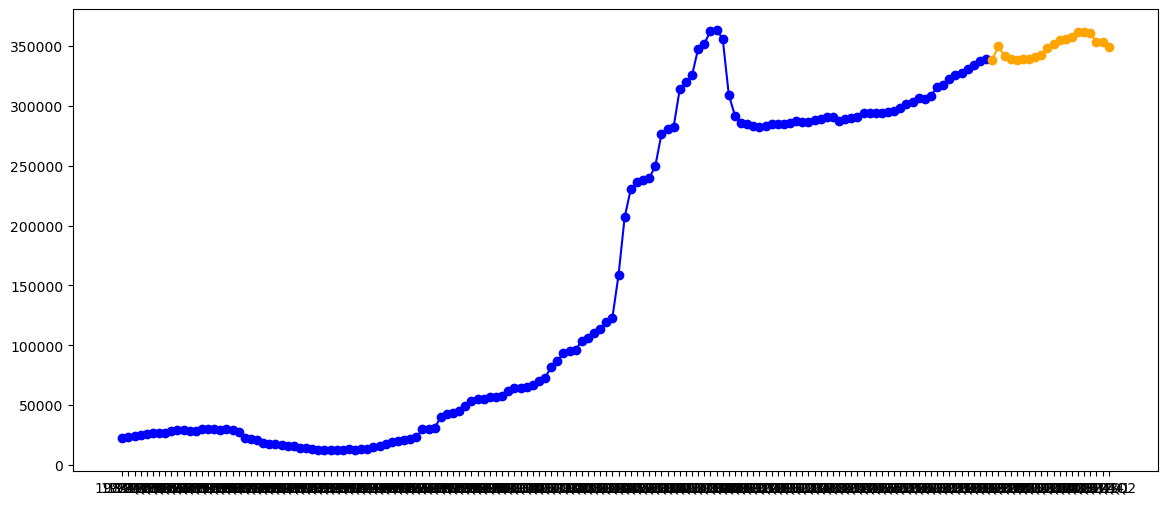

In [96]:

# Forecasting and plotting for test data
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train,
         dep_train,
         'b-o',
         label='Training Data')

# Plot test data
plt.plot(date_test.time,
         dep_test.deposits,
         color='orange',
         marker='o',
         label='Test Data')

# Plot fitted values for training data
plt.plot(date_train,
         sarima.fittedvalues,
         'r',
         label='Fitted Values')

plt.plot(extended_time_series,
         sarima.forecast(len(date_test)+16),
         '--r',
         label="Forecast")
plt.title("Test Set MASE = " + str(np.round(test_mase,8)),
             fontsize=14)
# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train[::5], extended_time_series[::5],])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()




In [ ]:
sarima1 = ARIMA(dep_train.values,
                    order = (1,0,1),
                    seasonal_order = (2,1,1,2)).fit()
sarima1.summary()

test_mase1 = mase(y_train = dep_train.values, y_test = dep_test.deposits.values, y_preds = sarima1.forecast(len(date_test)))


In [ ]:
date_test.time

In [87]:


# Function to generate future quarters
def generate_future_quarters(start, num_quarters):
    """Generate future quarterly periods starting from a given quarter."""
    year, quarter = map(int, start.split("Q"))
    future_quarters = []
    for _ in range(num_quarters):
        quarter += 1
        if quarter > 4:  # Wrap around to the next year
            quarter = 1
            year += 1
        future_quarters.append(f"{year}Q{quarter}")
    return future_quarters

# Generate 8 future quarters
last_quarter = date_test.time.iloc[-1]  # Get the last quarter in the series
future_quarters = generate_future_quarters(last_quarter, 16)  # Generate 8 future quarters

# Append future quarters to the original time series using pd.concat
extended_time_series = pd.concat([date_test.time, pd.Series(future_quarters)], ignore_index=True)

# Display the result
print(extended_time_series)



0     2019Q3
1     2019Q4
2     2020Q1
3     2020Q2
4     2020Q3
5     2020Q4
6     2021Q1
7     2021Q2
8     2021Q3
9     2021Q4
10    2022Q1
11    2022Q2
12    2022Q3
13    2022Q4
14    2023Q1
15    2023Q2
16    2023Q3
17    2023Q4
18    2024Q1
19    2024Q2
20    2024Q3
21    2024Q4
22    2025Q1
23    2025Q2
24    2025Q3
25    2025Q4
26    2026Q1
27    2026Q2
28    2026Q3
29    2026Q4
30    2027Q1
31    2027Q2
32    2027Q3
33    2027Q4
34    2028Q1
35    2028Q2
dtype: object


NameError: name 'sarima1' is not defined

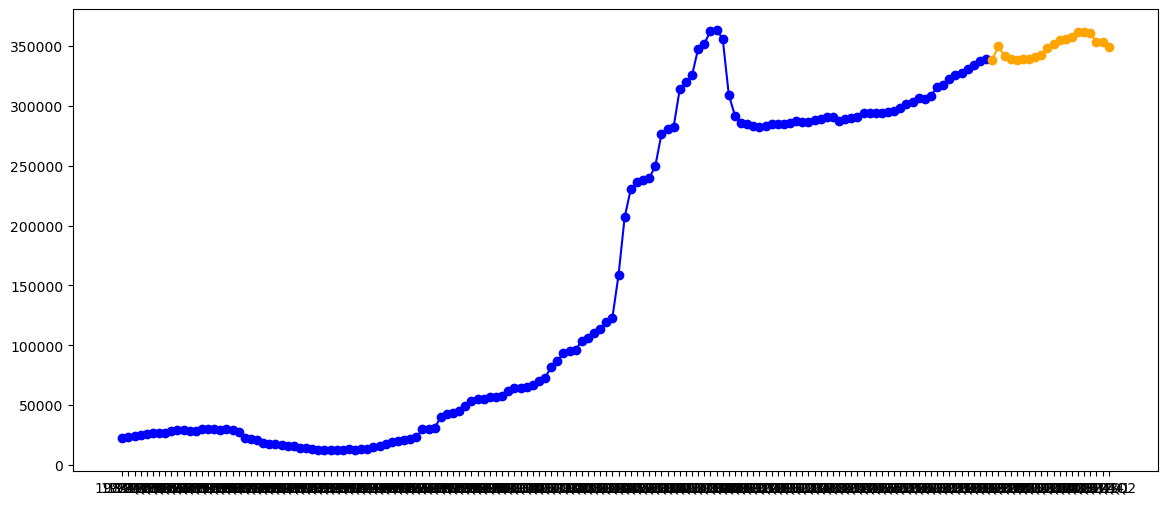

In [95]:
#(1,0,1)(2,1,1)[2]

import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train,
         dep_train,
         'b-o',
         label='Training Data')

# Plot test data
plt.plot(date_test.time,
         dep_test.deposits,
         color='orange',
         marker='o',
         label='Test Data')

# Plot fitted values for training data
plt.plot(date_train,
         sarima1.fittedvalues,
         'r',
         label='Fitted Values')


plt.plot(extended_time_series,
         sarima1.forecast(len(date_test)+16),
         '--r',
         label="Forecast")
plt.title("Test Set MASE = " + str(np.round(test_mase1,8)),
             fontsize=14)
# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train[::5], extended_time_series[::5],])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()


In [ ]:
rolling_avg_train_preds = dep_train.rolling(12).mean()
rolling_avg_test_preds = rolling_avg_train_preds.iloc[-1] * np.ones(len(dep_test))


In [ ]:
forecast1 = sarima1.forecast(2*len(date_test))
forecast1

In [ ]:
forecast = sarima.forecast(2*len(date_test))
forecast

In [ ]:
#baseline:
plt.figure(figsize=(14,5))
plt.scatter(df_train['date'],
              dep_train,
               alpha=.5,
               label="Training Points")

plt.scatter(date_test.date,
               dep_test.deposits,
               alpha=.5,
               c = 'red',
               marker = 'v',
               label="Test Points")

plt.plot(df_train['date'],
            rolling_avg_train_preds,
            'k-',
            linewidth = 2,
            label="Fitted Values")

plt.plot(date_test.date,
            rolling_avg_test_preds,
            'r--',from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate a dataset
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso regression with a regularization parameter alpha
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Display coefficients
print("Lasso Coefficients:", lasso.coef_)

# Identify selected features (non-zero coefficients)
selected_features = [i for i, coef in enumerate(lasso.coef_) if coef != 0]
print("Selected Features:", selected_features)

            linewidth=2,
            label="Forecast")

plt.legend(fontsize=12, loc=3)

test_mase_base = mase(y_train = dep_train, y_test = dep_test.deposits, y_preds = rolling_avg_test_preds)

plt.title("Test Set MASE = " + str(np.round(test_mase_base,3)),
             fontsize=14)

plt.xlabel("Deposit Level", fontsize=12)
plt.ylabel("Date", fontsize=12)






plt.show()

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
feature_scaled = scaler.fit_transform(df_reduced)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=14)
feature_pca = pca.fit_transform(feature_scaled)

# Check the amount of variance explained by the components
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained variance with {pca.n_components_} components: {explained_variance:.2f}")

In [13]:
df['deposits']

0       22917.257
1       23575.192
2       24308.965
3       24967.964
4       25673.746
5       26941.332
6       27141.405
7       27133.355
8       28651.198
9       29041.646
10      29089.391
11      28841.488
12      28715.469
13      30084.121
14      30114.432
15      30112.629
16      29670.701
17      30050.617
18      28929.456
19      27407.592
20      22463.251
21      22035.364
22      20782.366
23      18774.087
24      17379.316
25      17271.554
26      17116.974
27      16174.668
28      15608.863
29      14608.075
30      14221.318
31      13563.401
32      12346.514
33      12891.298
34      12849.570
35      12820.298
36      12835.764
37      13076.471
38      12820.749
39      13615.144
40      13540.975
41      14902.538
42      16234.489
43      17347.679
44      19601.736
45      20006.570
46      21032.702
47      21713.071
48      23586.351
49      29857.148
50      30391.749
51      31328.406
52      40035.438
53      42298.856
54      43752.527
55      45

In [25]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split



# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_reduced , df['deposits'])

# Fit Lasso regression with a regularization parameter alpha
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)


coefficients = lasso.coef_
feature_names = df_reduced.columns

# Combine feature names with coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort coefficients in descending order by absolute value
sorted_coef_df = coef_df.reindex(coef_df['Coefficient'].sort_values(ascending=False).index)

# Display sorted coefficients
print(sorted_coef_df)


                 Feature  Coefficient
15          accept_banks     1.620378
20      loans_leases_net     0.781485
33              goodwill     0.523338
8               loans_cc     0.195348
27        fed_funds_sold     0.129229
30         assets_intang     0.127039
61       loans_held_sale     0.114814
5         loans_farmland     0.107220
54     inc_comprehensive     0.073087
60  loans_foreign_office     0.073064
48           bank_eq_cap     0.072949
59    income_uncollected     0.071043
32           fv_mtg_serv     0.051291
10            loans_auto     0.049010
16          lease_receiv     0.040457
17    loans_leases_gross     0.034824
44      bank_accept_liab     0.030620
6          loans_com_ind     0.025521
31       mtg_serv_assets     0.024944
29        trading_assets     0.024073
1         loans_res_mort     0.020363
63           loan_commit     0.011337
11            loans_farm     0.011111
2           loans_nonres     0.010751
47                  liab     0.009318
42         f

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.246e+08, tolerance: 2.279e+08
  model = cd_fast.enet_coordinate_descent(


In [166]:
# Example indices of the columns you want to pick
indices_to_pick = [15,20,8,27,30,61,5,54,60,48,59,32,10,16,17,44,6,31,29,1,63]  # Replace with your desired column indices

# Select columns based on the indices
selected_columns = df_reduced.iloc[:, indices_to_pick]

train_features = selected_columns.iloc[:-20]

In [167]:
train_features

,accept_banks,loans_leases_net,loans_cc,fed_funds_sold,assets_intang,loans_held_sale,loans_farmland,inc_comprehensive,loans_foreign_office,bank_eq_cap,income_uncollected,fv_mtg_serv,loans_auto,lease_receiv,loans_leases_gross,bank_accept_liab,loans_com_ind,mtg_serv_assets,trading_assets,loans_res_mort,loan_commit
0,43352.639,60841.611,9488.601,123540.649,48984.226,28886.177,82512.338,59219.968,32528.179,66634.067,10896.438,22673.922,261504.050,36880.170,67095.432,222015.518,76143.265,9488.312,99275.278,1507883.0,518397.846
1,44043.459,64819.515,10267.934,120842.327,49821.779,30857.777,89458.084,60711.893,35042.125,68494.170,9562.185,17956.495,277997.483,39543.964,71012.799,226097.684,80906.268,9748.990,100055.723,1570636.0,514556.027
2,42959.259,66032.081,10135.080,119895.302,50433.840,33685.003,95575.014,61700.502,34227.727,70752.345,9403.549,27297.570,293062.319,43554.645,70346.462,235380.602,83868.639,10445.622,98432.351,1517173.0,403985.648
3,41106.912,64975.495,10832.407,122319.374,51086.406,31198.979,101280.900,63947.923,34353.201,73799.684,9250.874,28610.381,311073.622,49486.127,79365.599,240734.505,86997.618,10835.612,113815.463,1573287.0,400688.569
4,41118.221,64262.778,11149.968,118915.807,51709.118,31997.676,136587.129,66071.300,36269.541,77235.412,9649.138,27330.740,319655.925,50338.679,75134.414,238022.098,88924.702,12831.843,105795.944,1578838.0,408399.275
5,40468.738,64950.275,11525.941,120540.688,52471.429,31616.262,145796.507,68602.142,37018.544,84676.266,9500.751,30657.049,336394.990,50486.871,82701.091,236822.335,93190.996,13824.497,115902.178,1599543.0,410352.705
6,39319.772,64302.650,12562.736,127574.745,53408.026,31747.076,149328.874,70712.149,37489.551,75032.766,9982.889,33271.465,352401.455,52818.979,87243.064,251113.182,96771.736,14803.997,126305.467,1604824.0,411263.152
7,39568.320,62083.946,13267.506,162345.711,54483.262,30608.598,153769.005,74481.333,34484.718,77582.409,9404.482,40511.091,366687.386,61185.018,90280.266,273536.490,100782.222,15449.631,137329.358,1617332.0,405739.186
8,40444.607,59225.205,14590.688,151166.657,55201.554,31686.567,189985.905,77606.853,37264.748,81776.295,10481.283,45013.707,367784.679,62016.056,89102.847,280035.027,87046.165,17010.464,140187.275,1622779.0,419018.316
9,40320.472,58569.694,15408.443,146759.627,55809.487,31194.966,195656.769,79993.739,38906.612,84109.519,10608.153,43422.721,379487.626,60882.986,92844.984,286713.113,88831.860,18400.614,141229.892,1643642.0,416611.368


In [168]:
test_features = selected_columns.iloc[-20:]
test_features


,accept_banks,loans_leases_net,loans_cc,fed_funds_sold,assets_intang,loans_held_sale,loans_farmland,inc_comprehensive,loans_foreign_office,bank_eq_cap,income_uncollected,fv_mtg_serv,loans_auto,lease_receiv,loans_leases_gross,bank_accept_liab,loans_com_ind,mtg_serv_assets,trading_assets,loans_res_mort,loan_commit
142,8691.477,2275.313,61941.573,308460.119,182700.581,58861.966,360044.668,1265530.549,57397.609,432824.157,38146.251,706181.804,1779258.789,185521.986,927151.942,267773.661,451964.846,6189.632,560753.830,2065840.0,1892455.870
143,9362.379,2337.410,63805.430,313359.621,187428.064,57938.345,361892.516,1291354.134,55258.502,420132.786,40154.297,658807.264,1837512.969,183365.743,948534.673,232603.754,458611.964,5709.468,562753.762,2063268.0,1805602.920
144,9426.794,2299.751,61220.833,331247.124,187757.221,55236.960,370031.036,1296042.440,64534.919,518267.900,37854.203,796215.504,1771389.445,188443.076,1075659.457,285256.199,468736.716,5589.946,587454.026,2069356.0,2142339.585
145,8757.854,3803.241,65239.590,342357.846,187806.681,57173.309,380892.683,1307807.619,76859.571,493567.284,41394.055,758423.013,1704208.587,197204.522,1005712.497,289149.698,474043.905,5020.703,811355.835,2077846.0,2051507.946
146,7231.884,3622.933,66753.045,355857.968,188291.932,57926.013,386363.028,1310292.467,83683.397,485940.076,43496.157,746095.720,1709912.219,197642.668,1046081.018,290880.887,478504.133,4547.979,769031.145,2071908.0,2082238.087
147,8128.283,3195.559,69864.170,375935.736,188487.224,57195.761,385920.162,1315818.477,84597.147,483088.623,44205.109,731743.574,1744176.588,197462.876,1102035.634,267152.333,479371.888,4626.362,782619.152,2065603.0,2160205.041
148,10478.885,3071.150,68739.542,386724.399,187481.874,55303.034,388244.251,1336018.552,81348.092,516705.123,41561.071,782206.693,1689868.952,197461.986,1138184.606,297790.125,480616.187,4432.412,571518.358,2067219.0,2297944.704
149,8027.489,2986.556,69405.502,401802.426,186647.474,54600.949,393366.089,1347737.439,74414.119,503581.861,35270.621,790673.930,1757406.243,197573.514,1188573.552,247949.007,490617.299,4149.089,580410.030,2058710.0,2307799.723
150,7359.920,2408.836,68876.757,411983.981,186368.868,53969.588,402131.041,1380226.661,68837.686,541843.631,33898.048,805512.569,1797048.792,196274.744,1232443.108,264354.248,496187.039,3817.415,589487.653,2056576.0,2315755.893
151,7305.028,2129.431,68867.829,423814.997,186811.320,54002.201,401544.270,1397823.282,64235.882,499077.700,35475.423,723750.853,1881990.366,198017.628,1315152.030,260277.138,512648.228,2961.546,599148.158,2069043.0,2234161.014


In [169]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#(2,0,0)(0,1,1)[7]
#(1,0,1)(2,1,1)[2]

model = SARIMAX(
    endog = dep_train.values,
    exog = train_features,  # Pass None if no exogenous variables
    order = (2,0,0), # Example: (1, 1, 1)
    seasonal_order = (0,1,1,7),  # Example: (1, 1, 1, 12) for yearly seasonality
)
sarima_fea = model.fit(disp=False)
sarima_fea.summary()


/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  142
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 7)   Log Likelihood               -1369.243
Date:                             Sat, 23 Nov 2024   AIC                           2788.485
Time:                                     23:30:48   BIC                           2861.117
Sample:                                          0   HQIC                          2818.001
                                             - 142                                         
Covariance Type:                               opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
accept_banks             1.4835      1.027      1.445      0.149      -0.529       3.496
loans_leases_net         0.2112      0.733      0.288      0.773      -1.226       1.648
loans_cc                 0.5356      0.736      0.728      0.466      -0.906       1.977
fed_funds_sold           0.0055      0.268      0.020      0.984      -0.521       0.532
assets_intang           -0.1748      0.209     -0.836      0.403      -0.585       0.235
loans_held_sale          0.0164      0.756      0.022      0.983      -1.466       1.499
loans_farmland           0.1913      0.084      2.270      0.023       0.026       0.356
inc_comprehensive        0.3798      0.078      4.885      0.000       0.227       0.532
loans_foreign_office    -0.3354      0.208     -1.611      0.107      -0.744       0.073
bank_eq_cap              0.0426      0.084      0.505      0.613      -0.122       0.208
income_uncollected      -0.4423      0.334     -1.325      0.185      -1.097       0.212
fv_mtg_serv              0.0170      0.046      0.370      0.711      -0.073       0.107
loans_auto               0.0288      0.056      0.516      0.606      -0.081       0.138
lease_receiv            -0.5079      0.573     -0.886      0.376      -1.631       0.616
loans_leases_gross      -0.0130      0.092     -0.142      0.887      -0.193       0.167
bank_accept_liab        -0.0289      0.042     -0.688      0.492      -0.111       0.053
loans_com_ind           -0.3413      0.280     -1.218      0.223      -0.890       0.208
mtg_serv_assets          0.1586      0.652      0.243      0.808      -1.119       1.436
trading_assets           0.0477      0.051      0.927      0.354      -0.053       0.148
loans_res_mort          -0.0296      0.020     -1.498      0.134      -0.068       0.009
loan_commit              0.0049      0.043      0.112      0.911      -0.080       0.090
ar.L1                    0.8563      0.279      3.073      0.002       0.310       1.402
ar.L2                   -0.1696      0.275     -0.616      0.538      -0.709       0.370
ma.S.L7                 -0.8018      0.168     -4.776      0.000      -1.131      -0.473
sigma2                5.919e+07   1.32e-08   4.49e+15      0.000    5.92e+07    5.92e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               613.41
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               4.35   Skew:                            -1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singul

In [170]:
y_preds = sarima_fea.predict(start=len(dep_train), end=len(dep_train) + len(dep_test) - 1,exog=test_features)
test_mase_X = mase(y_train=dep_train.values, y_test=dep_test.deposits.values, y_preds=y_preds)


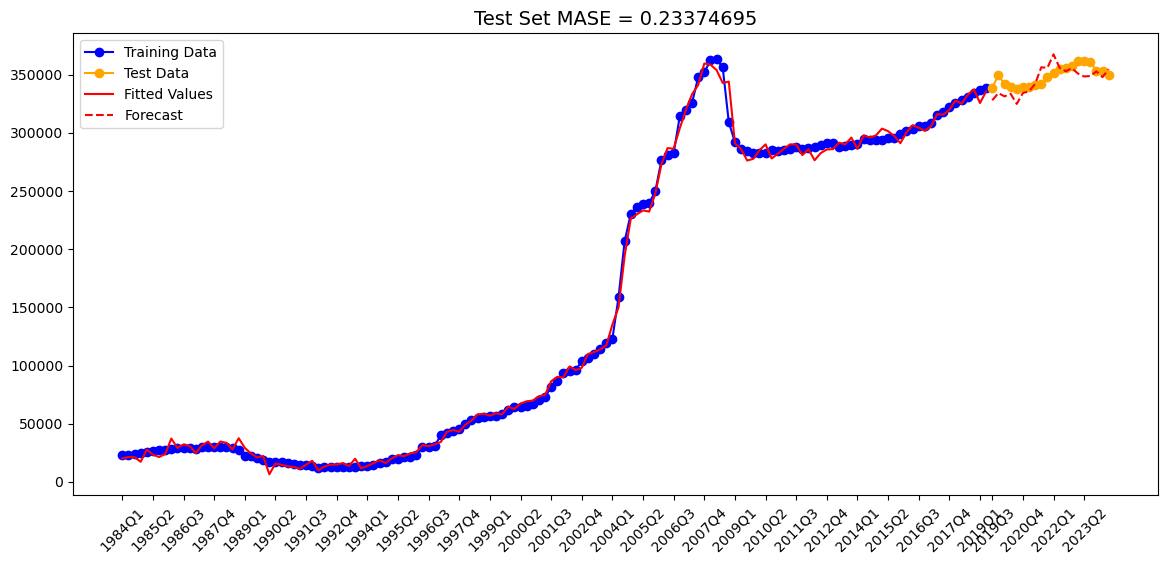

In [171]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train,
         dep_train,
         'b-o',
         label='Training Data')

# Plot test data
plt.plot(date_test.time,
         dep_test.deposits,
         color='orange',
         marker='o',
         label='Test Data')

# Plot fitted values for training data
plt.plot(date_train,
         sarima_fea.fittedvalues,
         'r',
         label='Fitted Values')


plt.plot(date_test.time,
         sarima_fea.forecast(len(date_test),exog=test_features),
         '--r',
         label="Forecast")
plt.title("Test Set MASE = " + str(np.round(test_mase_X,8)),
             fontsize=14)
# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train[::5], date_test.time[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()




